In [ ]:
# read data from google drive
# from google.colab import drive
# drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# !ls '/content/gdrive/MyDrive/Colab Notebooks/mdm'
# data_path = '/content/gdrive/MyDrive/Colab Notebooks/mdm/abstractdata5.csv'

# Project Work in CS-E4650 Methods of Data mining

## Ming Jiang - 1016239 ; Gengcong Yan - 1009903

You can run the program following the thread in current file. There 
are 6 sections in code: 

**Data load** - **Data preprocessing** - **Baselines** - **Kmeans with cosine similarity** - **Word2Vec** - **Word loud generation**. 

Required Packages: Numpy, Pandas, nltk, re, itertools, sklearn, gensim, wordcloud.

## Data load

In [ ]:
import numpy as np
import pandas as pd
import nltk
import re
import itertools
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from string import punctuation

import gensim
import os
import re
import sys 
import multiprocessing

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# data loader
# read data from github 
data_path = 'https://raw.githubusercontent.com/Rigel-Everlasting/text_similarity/main/abstractdata5.csv'
headers_name = ['id', 'class', 'title', 'abstract']
data = pd.read_csv(data_path, delimiter='#', names=headers_name)
data.sample(5)

,id,class,title,abstract
337,id338,3,Ensemble feature extraction for multi-containe...,Quality-Diversity algorithms search for large ...
338,id339,4,Certificateless Signcryption Scheme from Lattice,Certificateless signcryption can simultaneousl...
318,id319,3,Continuous Tongue Robot Mapping for Paralyzed ...,Individuals with tetraplegia have a challengin...
1152,id1153,4,Card-based Cryptography with Dihedral Symmetry,It is known that secure computation can be don...
365,id366,2,Which BM25 do you mean? A large-scale reproduc...,"When researchers speak of BM25, it is not enti..."


## Data Preprocessing

In [ ]:
# 
"""data preprocessing
"""
data['text'] = data['title'] + data['abstract']
text_data = data['text'].to_list()

# Step 1: tokenization
tokens_list = [word_tokenize(i) for i in text_data]
print('After tokenization:')
for i in tokens_list[:5]:
    print(i)
print()

# Step 2: stemming
porter = PorterStemmer()
#or snowball stemmer
stemmer = SnowballStemmer("english",ignore_stopwords=True)
stemmed_tokens_list = []
for i in tokens_list:
    stemmed_tokens_list.append([porter.stem(j) for j in i])
print('After stemming:')
for i in stemmed_tokens_list[:5]:
    print(i)

# Step 3 & 4: remove stop words and punctuation
stop_words = set(stopwords.words('english'))
print('Stop words we are using from NLTK:')
print(stop_words)
print()

# We include the punctuation in the stop words set.
stop_words.update(punctuation)
stop_words.add("...")

filtered_sentence = []    
for i in stemmed_tokens_list: 
    filtered_sentence.append([token for token in i if token not in stop_words]) 
    
# Numbers are also removed
filtered_sentence = [ ' '.join(i) for i in filtered_sentence ]
filtered_sentence = [ re.sub(r'\d+', '', sentence) for sentence in filtered_sentence ]

print('After removing stop words, punctuation and numbers:')
for i in filtered_sentence[:5]:
    print(i)
print()

After tokenization:
['Anomaly', 'detection', 'in', 'wide', 'area', 'imagery', '[', 'Geniş', 'alan', 'görüntülerinde', 'anomali', 'tespiti', ']', 'This', 'study', 'is', 'about', 'detecting', 'anomalies', 'in', 'wide', 'area', 'imagery', 'collected', 'from', 'an', 'aircraft', '.', 'The', 'set', 'of', 'anomalies', 'have', 'been', 'identified', 'as', 'anything', 'out', 'of', 'the', 'normal', 'course', 'of', 'action', '.', 'For', 'this', 'purpose', ',', 'two', 'different', 'data', 'sets', 'were', 'used', 'and', 'the', 'experiments', 'were', 'carried', 'out', 'on', 'these', 'data', 'sets', '.', 'For', 'anomaly', 'detection', ',', 'a', 'convolutional', 'neural', 'network', 'model', 'that', 'tries', 'to', 'generate', 'the', 'next', 'image', 'using', 'past', 'images', 'is', 'designed', '.', 'The', 'images', 'were', 'pre-processed', 'before', 'being', 'given', 'to', 'the', 'model', '.', 'Anomaly', 'detection', 'is', 'performed', 'by', 'comparing', 'the', 'estimated', 'image', 'and', 'the', 'true

In [ ]:
# # Tf-idf normalization 

tfidf_vectorizer = TfidfVectorizer(smooth_idf=True)
tfidf_vectorizer.fit(filtered_sentence)
tf_idf_vectors = tfidf_vectorizer.transform(filtered_sentence)

# Now all the reviews are transformed into tf-idf vectors. The length of each vector equals to the size of the vocabulary of the dataset. 
# The value of each element in the vectors indicates the tf-idf score of the corresponding words in the vectors. 
print('After Tf-idf normalization:')
print("Some example words of the vocabulary (i.e., features):")
print(tfidf_vectorizer.get_feature_names()[:20])
print()
print('The idf sscores of these tokens/features:')
print(tfidf_vectorizer.idf_[:20])
print()
print("Vector space representations of first five reviews after tf-idf normalization:")
counter = 0    
for i in list(tf_idf_vectors):
    if counter >= 5:
        break
    else:
        counter += 1
    print(i.todense())
print("Note: Most entries of the vectors are zero because typically each reviews only contains only few words of the entire vocabulary.")

#Look at tf-idf values of the first review
feature_names = tfidf_vectorizer.get_feature_names()
feature_index = tf_idf_vectors[0,:].nonzero()[1]
tfidf_scores = zip(feature_index, [tf_idf_vectors[0, x] for x in feature_index])
for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
   print(w, s)

After Tf-idf normalization:
Some example words of the vocabulary (i.e., features):
['aan', 'aanmdof', 'aatcc', 'ab', 'abadi', 'abandon', 'abattoir', 'abc', 'abdomen', 'abdomin', 'abe', 'aberr', 'abil', 'abilhand', 'abl', 'ablat', 'able', 'abnorm', 'aborigin', 'abort']

The idf sscores of these tokens/features:
[7.50204014 7.50204014 7.50204014 7.09657503 7.09657503 6.80889296
 7.50204014 7.50204014 7.50204014 7.50204014 7.50204014 7.50204014
 3.81316069 7.09657503 3.68432781 6.40342785 6.80889296 5.89260223
 7.50204014 7.50204014]

Vector space representations of first five reviews after tf-idf normalization:
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
Note: Most entries of the vectors are zero because typically each reviews only contains only few words of the entire vocabulary.
wide 0.14797626389432733
use 0.05722647445900836
two 0.05093826135296718
true 0.11308665390811341
tri 0.11050711548541156
th

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tf_idf_vectors.shape

(1332, 10260)

## Baselines
- tf_idf vectors as the input features
- SVD for dimension reduction(Since PCA is not suitable for the sparse matrix)
- Two clustering features, kmeans and spectral clustering


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi_score
from sklearn.cluster import SpectralClustering as spt_clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity as cos_sim

from nltk.cluster import KMeansClusterer

In [ ]:
# Baseline models
def reduce_dim(X, out_dim=256):
  clf = TruncatedSVD(out_dim)
  X_ = clf.fit_transform(X)
  return X_

def k_means(X, n_clusters=5, random_state=2):
  kmeans = KMeans(n_clusters=n_clusters, random_state=random_state).fit(X)
  y_pred = kmeans.labels_
  return y_pred

def spt(X, n_clusters=5, gamma=0.8, assign_labels='discretize', random_state=2):
  sc = spt_clustering(
      n_clusters=n_clusters, gamma=gamma, assign_labels=assign_labels, random_state=random_state
      ).fit(X)
  y_pred = sc.labels_
  return y_pred

def kmeans_cos(X, n_clusters=5):
  kcluster = KMeansClusterer(n_clusters, distance=nltk.cluster.util.cosine_distance, repeats=30)
  y_pred = kcluster.cluster(X, assign_clusters=True)
  return y_pred

In [ ]:
def run(X, y, dim):
  X_ = reduce_dim(X, dim)

  spt_y = spt(X_)
  km_y = k_means(X_)
  cos_y = kmeans_cos(X_)

  spt_nmi = nmi_score(y, spt_y)
  km_nmi = nmi_score(y, km_y)
  cos_nmi = nmi_score(y, cos_y)

  # print(f' baseline kmeans nmi score: {km_nmi}, dim={dim}')
  # print(f' baseline spectral clustering nmi score: {spt_nmi}, dim={dim}')
  # print(f' kmeans with cosine similarity matrix nmi score: {cos_nmi}, dim={dim}')
  return km_nmi, spt_nmi, cos_nmi

In [ ]:
X = tf_idf_vectors
y = data['class'].to_numpy()  
# dims = [50, 60, 80, 100, 128, 256, 512]
DIMS = [64, 128, 256, 512]
ITER = 3
N_CLUSTERS = 5
METHODS = 3


def main(X, y, dims=DIMS, iter=ITER):
  nmi_scores = np.zeros((METHODS, len(dims)))
  for col, dim in enumerate(dims):
    kms, spts, coss = 0, 0, 0
    for i in range(ITER):
      km, spt, cos = run(X, y, dim)
      kms += km
      spts += spt
      coss += cos
    kms /= iter
    spts /= iter
    coss /= iter
    nmi_scores[0][col] = kms
    nmi_scores[1][col] = spts
    nmi_scores[2][col] = coss
  return nmi_scores / iter

nmi_scores = main(X, y)
nmi_scores

array([[0.22714113, 0.22121912, 0.21485419, 0.23498086],
       [0.26209138, 0.2606672 , 0.25966995, 0.25864979],
       [0.26638011, 0.27085598, 0.26871512, 0.2694352 ]])

In [ ]:
np.round(nmi_scores / ITER, 4)

array([[0.6947, 0.6705, 0.7105, 0.7414],
       [0.7816, 0.7726, 0.7608, 0.6697],
       [0.8022, 0.8095, 0.8104, 0.8156]])

## kmeans with cosine similarity matrix

In [ ]:
from nltk.cluster import KMeansClusterer
import nltk
# dims = [50, 100, 128, 150, 200, 256, 300, 350, 400, 450, 512, 550, 600, 1024] 
n_clusters = 5
for dim in DIMS:
  kcluster = KMeansClusterer(n_clusters, distance=nltk.cluster.util.cosine_distance, repeats=30)
  X_ = reduce_dim(X, out_dim=dim)
  y_pred = kcluster.cluster(X_, assign_clusters=True)
  nmi = nmi_score(y, y_pred)
  print(f' kmeans with cosine similarity matrix nmi score: {nmi}, dim={dim}')

 kmeans with cosine similarity matrix nmi score: 0.8007148148781165, dim=64
 kmeans with cosine similarity matrix nmi score: 0.8099943942460901, dim=128
 kmeans with cosine similarity matrix nmi score: 0.8129836516584905, dim=256
 kmeans with cosine similarity matrix nmi score: 0.8140247995548957, dim=512


## Word2vec
- Optimize the features
- average pooling
- tf-idf weighted pooling

In [ ]:
from gensim.models import fasttext
from gensim.models import Word2Vec

In [ ]:
data.head(2)

,id,class,title,abstract,text
0,id1,1,Anomaly detection in wide area imagery [Geniş ...,This study is about detecting anomalies in wid...,Anomaly detection in wide area imagery [Geniş ...
1,id2,1,Person re-identification with deep kronecker-p...,Person re-identification (re-ID) aims to robus...,Person re-identification with deep kronecker-p...


In [ ]:
# combine the title and abstract for sentences
data['s1'] = data['abstract'].apply(nltk.sent_tokenize)
abstracts = list(itertools.chain(*data['s1'].to_list()))
titles = data['title'].to_list()
text_data = titles + abstracts
text_data[:2]

# Step 1: tokenization
tokens_list = [word_tokenize(i) for i in text_data]
print('After tokenization:')
for i in tokens_list[:5]:
    print(i)
print()

# Step 2: stemming
porter = PorterStemmer()
#or snowball stemmer
#stemmer = SnowballStemmer("english",ignore_stopwords=True)
stemmed_tokens_list = []
for i in tokens_list:
    stemmed_tokens_list.append([porter.stem(j) for j in i])
print('After stemming:')
for i in stemmed_tokens_list[:5]:
    print(i)

# Step 3 & 4: remove stop words and punctuation
stop_words = set(stopwords.words('english'))
print('Stop words we are using from NLTK:')
print(stop_words)
print()

# We include the punctuation in the stop words set.
stop_words.update(punctuation)
stop_words.add("...")

filtered_sentence = []    
for i in stemmed_tokens_list: 
    filtered_sentence.append([token for token in i if token not in stop_words]) 
    
# Numbers are also removed
filtered_sentence = [ ' '.join(i) for i in filtered_sentence ]
filtered_sentence = [ re.sub(r'\d+', '', sentence) for sentence in filtered_sentence ]

sentences = [word_tokenize(i) for i in filtered_sentence]
sentences[:2]

After tokenization:
['Anomaly', 'detection', 'in', 'wide', 'area', 'imagery', '[', 'Geniş', 'alan', 'görüntülerinde', 'anomali', 'tespiti', ']']
['Person', 're-identification', 'with', 'deep', 'kronecker-product', 'matching', 'and', 'group-shuffling', 'random', 'walk']
['Crack', 'detection', 'in', 'images', 'of', 'masonry', 'using', 'cnns']
['Towards', 'an', 'energy', 'efficient', 'code', 'generator', 'for', 'mobile', 'phones']
['Sub-polyhedral', 'scheduling', 'using', '(', 'Unit-', ')', 'two-variable-per-inequality', 'polyhedra']

After stemming:
['anomali', 'detect', 'in', 'wide', 'area', 'imageri', '[', 'geniş', 'alan', 'görüntülerind', 'anomali', 'tespiti', ']']
['person', 're-identif', 'with', 'deep', 'kronecker-product', 'match', 'and', 'group-shuffl', 'random', 'walk']
['crack', 'detect', 'in', 'imag', 'of', 'masonri', 'use', 'cnn']
['toward', 'an', 'energi', 'effici', 'code', 'gener', 'for', 'mobil', 'phone']
['sub-polyhedr', 'schedul', 'use', '(', 'unit-', ')', 'two-variable-p

[['anomali',
  'detect',
  'wide',
  'area',
  'imageri',
  'geniş',
  'alan',
  'görüntülerind',
  'anomali',
  'tespiti'],
 ['person',
  're-identif',
  'deep',
  'kronecker-product',
  'match',
  'group-shuffl',
  'random',
  'walk']]

In [ ]:
tfidf = tf_idf_vectors

In [ ]:
dim = 512
window= 5
min_count= 1
workers = 4

w2v = Word2Vec(sentences=sentences, size=dim, window=window, min_count=min_count, workers=workers)
w2v.train(sentences, total_examples=len(sentences), epochs=20)
w2v.save("word2vec.model")

In [ ]:
w2v.wv.most_similar('imageri', topn=10) 

[('street', 0.9591394662857056),
 ('view', 0.8640817403793335),
 ('cctv', 0.8523416519165039),
 ('televis', 0.8416686058044434),
 ('sport', 0.8252468705177307),
 ('footag', 0.8193408250808716),
 ('diagnosi', 0.8139573335647583),
 ('closed-circuit', 0.8069018125534058),
 ('suicid', 0.797510027885437),
 ('commerci', 0.7935096621513367)]

## tf-idf weighted pooling

In [ ]:
words = tfidf_vectorizer.get_feature_names()
vocab = w2v.wv.vocab.keys()

embs = []
for row in range(len(data)):
  idx = tf_idf_vectors[row,:].nonzero()[1]
  embedding = np.zeros(dim)
  norm = 0
  for id in idx:
    word = words[id]
    tf = tf_idf_vectors[row, id]
    if word in w2v.wv.vocab:
      # print(tf)
      vect = w2v.wv.get_vector(word)
      embedding += tf * vect
      norm += 1
  # print(norm, len(idx))
  embedding /= norm
  embs.append(embedding)
embs = np.array(embs)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=5
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=30)
y_w2v = kclusterer.cluster(embs, assign_clusters=True)

In [ ]:
nmi = nmi_score(y, y_w2v)
print(f' w2v+tf-idf pooling kmeans nmi score: {nmi}')

 baseline kmeans nmi score: 0.6988834225373041


## Word Cloud Generation

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [ ]:
# data loader
# read data from github 
data_path = 'https://raw.githubusercontent.com/Rigel-Everlasting/text_similarity/main/abstractdata5.csv'
headers_name = ['id', 'class', 'title', 'abstract']
data = pd.read_csv(data_path, delimiter='#', names=headers_name)
data.head(5)

,id,class,title,abstract
0,id1,1,Anomaly detection in wide area imagery [Geniş ...,This study is about detecting anomalies in wid...
1,id2,1,Person re-identification with deep kronecker-p...,Person re-identification (re-ID) aims to robus...
2,id3,1,Crack detection in images of masonry using cnns,While there is a significant body of research ...
3,id4,5,Towards an energy efficient code generator for...,Using a smartphone become the part of our ever...
4,id5,5,Sub-polyhedral scheduling using (Unit-)two-var...,Polyhedral compilation has been successful in ...


In [ ]:
filtered_sentence[0:5]

['anomali detect wide area imageri geniş alan görüntülerind anomali tespiti thi studi detect anomali wide area imageri collect aircraft set anomali identifi anyth normal cours action thi purpos two differ data set use experi carri data set anomali detect convolut neural network model tri gener next imag use past imag design imag pre-process befor given model anomali detect perform compar estim imag true imag',
 'person re-identif deep kronecker-product match group-shuffl random walkperson re-identif re-id aim robustli measur visual affin person imag It ha wide applic intellig surveil associ person imag across multipl camera It gener treat imag retriev problem given probe person imag affin probe imag galleri imag pg affin use rank retriev galleri imag exist two main challeng effect solv thi problem  person imag usual show signific variat becaus differ person pose view angl spatial layout correspond person imag therefor vital inform tackl thi problem state-of-the-art method either ignor 

In [ ]:
X = tf_idf_vectors
y = data['class'].to_numpy()  

In [ ]:
from nltk.cluster import KMeansClusterer
import nltk

n_clusters=5
out_dim=256



kcluster = KMeansClusterer(n_clusters, distance=nltk.cluster.util.cosine_distance, repeats=30)
X_ = reduce_dim(X, out_dim)
y_pred = kcluster.cluster(X_, assign_clusters=True)
nmi = nmi_score(y, y_pred)
print(f' kmeans with cosine similarity matrix nmi score: {nmi}')



 kmeans with cosine similarity matrix nmi score: 0.8226949804181379


In [ ]:
# group all sentences into corresponding clusters

print(len(y_pred))
y_pred[0:20]

y_pred=np.array(y_pred)
filtered_sentence=np.array(filtered_sentence)
groups=[]
for i in range(5):

  indexs=np.where(y_pred == i)
  # print(re0)
  sentences=filtered_sentence[indexs]
  groups.append(sentences)

print(len(groups))
print(groups[0][0:5])
print(filtered_sentence[7])

1332
5
['anomali detect wide area imageri geniş alan görüntülerind anomali tespiti thi studi detect anomali wide area imageri collect aircraft set anomali identifi anyth normal cours action thi purpos two differ data set use experi carri data set anomali detect convolut neural network model tri gener next imag use past imag design imag pre-process befor given model anomali detect perform compar estim imag true imag'
 'person re-identif deep kronecker-product match group-shuffl random walkperson re-identif re-id aim robustli measur visual affin person imag It ha wide applic intellig surveil associ person imag across multipl camera It gener treat imag retriev problem given probe person imag affin probe imag galleri imag pg affin use rank retriev galleri imag exist two main challeng effect solv thi problem  person imag usual show signific variat becaus differ person pose view angl spatial layout correspond person imag therefor vital inform tackl thi problem state-of-the-art method either 


4 == database related

3 == Security encrtption Internet safety attack

2 == Compile Program Opeartion System

1 == Robot Control Design

0 == Image ComputerVision Camera image Detection

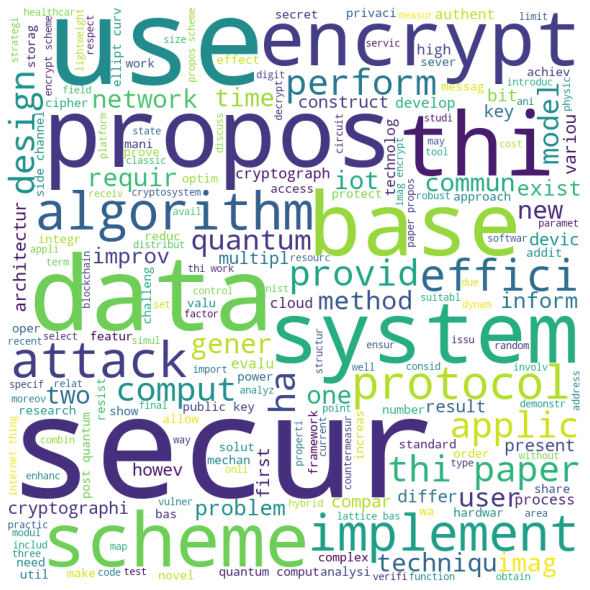

In [ ]:
#current cluster
'''
4 == Security encrtption Quantum scheme protocol attack network cryptograph safety 
3 == Query Sql DatabaseSystem Design Use related
2 == Compile language optimize implement code parallel system analysis Program Opeartion System
1 == Robot Control Design Task Sensor learn simulation
0 == Image ComputerVision dataset train visual image Detection
'''
c_cluster=4
data = " ".join(s for s in groups[c_cluster])
# print(data)


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10, max_font_size = 200 ).generate(data)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()